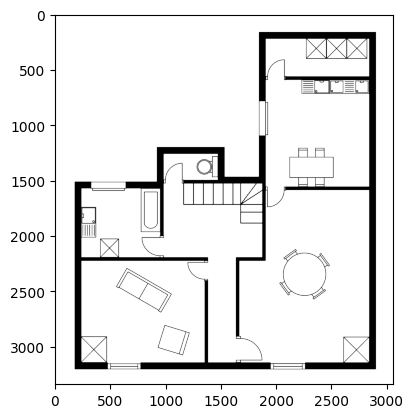

In [34]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt

preprocess_image = tf.keras.preprocessing.image.load_img("images/file.tiff")
converted = tf.image.rgb_to_grayscale(preprocess_image)
plt.imshow(converted, cmap='Greys_r')

In [ ]:
import cv2
import numpy as np

# Load the floorplan image
img = cv2.imread('images/file.tiff', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
img = cv2.GaussianBlur(img, (3,3), 0)

# Apply Canny edge detection to find edges
edges = cv2.Canny(img, 50, 150, apertureSize=3)

# Apply morphological closing to fill in gaps in walls
kernel = np.ones((5,5),np.uint8)
edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Apply threshold to generate binary image
ret, thresh = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY)

# Find contours and draw them on a black background
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_img = np.zeros_like(img)
cv2.drawContours(contours_img, contours, -1, (255,255,255), -1)

# Show the resulting image with only walls
cv2.imshow('Walls only', contours_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
import cv2
import numpy as np

def analyze_floorplan(image_path):
    # Load image
    image = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to create binary image
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Extract outer and inner contours
    outer_contour = None
    inner_contours = []

    for i in range(len(contours)):
        if hierarchy[0][i][3] == -1:
            if outer_contour is None:
                outer_contour = contours[i]
            else:
                inner_contours.append(contours[i])

    # Compute size of outer contour
    outer_size = []
    for i in range(len(outer_contour)):
        start = outer_contour[i][0]
        end = outer_contour[(i+1)%len(outer_contour)][0]
        vector = np.array([end[0]-start[0], end[1]-start[1]])
        outer_size.append(vector)

    # Compute size of inner contours
    inner_sizes = []
    for inner_contour in inner_contours:
        inner_size = []
        for i in range(len(inner_contour)):
            start = inner_contour[i][0]
            end = inner_contour[(i+1)%len(inner_contour)][0]
            vector = np.array([end[0]-start[0], end[1]-start[1]])
            inner_size.append(vector)
        inner_sizes.append(inner_size)

    # Identify straight walls
    straight_walls = []
    for contour in [outer_contour] + inner_contours:
        for i in range(len(contour)):
            start = contour[i][0]
            end = contour[(i+1)%len(contour)][0]
            vector = np.array([end[0]-start[0], end[1]-start[1]])
            if np.linalg.norm(vector) > 10:  # Only consider walls longer than a threshold length
                unit_vector = vector / np.linalg.norm(vector)
                angle = np.arctan2(unit_vector[1], unit_vector[0])
                straight_vector = np.array([np.cos(angle), np.sin(angle)])
                straight_walls.append(straight_vector)
            print(straight_walls)
    return straight_walls

analyze_floorplan("images/file.tiff")


[array([6.123234e-17, 1.000000e+00])]
[array([6.123234e-17, 1.000000e+00]), array([1., 0.])]
[array([6.123234e-17, 1.000000e+00]), array([1., 0.]), array([ 6.123234e-17, -1.000000e+00])]
[array([6.123234e-17, 1.000000e+00]), array([1., 0.]), array([ 6.123234e-17, -1.000000e+00]), array([-1.0000000e+00,  1.2246468e-16])]


[array([6.123234e-17, 1.000000e+00]),
 array([1., 0.]),
 array([ 6.123234e-17, -1.000000e+00]),
 array([-1.0000000e+00,  1.2246468e-16])]

In [ ]:
import cv2
import numpy as np

def remove_non_walls(image_path):
    # Load image
    image = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to create binary image
    _, thresh = cv2.threshold(gray, 164, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Extract outer and inner contours
    outer_contour = None
    inner_contours = []

    for i in range(len(contours)):
        if hierarchy[0][i][3] == -1:
            if outer_contour is None:
                outer_contour = contours[i]
            else:
                inner_contours.append(contours[i])

    # Create mask for walls
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [outer_contour], 0, 255, thickness=-1)
    for inner_contour in inner_contours:
        cv2.drawContours(mask, [inner_contour], 0, 0, thickness=-1)

    # Apply mask to original image
    result = cv2.bitwise_and(image, image, mask=mask)

    return result

image = remove_non_walls("images/file.tiff")
cv2.imshow("Walls", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

# Create a callback function for the trackbar
def on_trackbar(val):
    # Blur the input image
    blur = cv2.GaussianBlur(img_gray, (val, val), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blur, 50, 150)

    # Find contours in the image
    contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a black image to draw the contours on
    black = np.zeros_like(img)

    # Draw the contours on the black image
    cv2.drawContours(black, contours, -1, (0, 0, 255), 3)

    # Show the image with contours
    cv2.imshow('Outer Walls', black)

# Load the input image
img = cv2.imread('images/file.tiff')

# Convert the image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create a window to display the image
cv2.namedWindow('Outer Walls')

# Create a trackbar to adjust the blur kernel size
cv2.createTrackbar('Blur', 'Outer Walls', 1, 10, on_trackbar)

# Initialize the trackbar to its default position
on_trackbar(1)

# Wait for a key press and then exit
cv2.waitKey(0)
cv2.destroyAllWindows()